In [1]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Random Forest Classifier Workflow for Classifying

#### Get the data ready

In [2]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

In [8]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 1    165
 0    138
 Name: target, dtype: int64)

In [10]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [11]:
# We'll use a Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#### Fit the model to the data and use it to make a prediction
Fitting the model on the data involves passing it the data and asking it to figure out the patterns. 

If there are labels (supervised learning), the model tries to work out the relationship between the data and the labels. 

If there are no labels (unsupervised learning), the model tries to find patterns and group similar samples together.

In [12]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3


In [14]:
y_preds = clf.predict(X_test)

In [15]:
y_preds

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

#### Evaluate the model

In [16]:
# Evaluate the model on the training set
clf.score(X_train, y_train)

1.0

In [17]:
# Evaluate the model on the test set
clf.score(X_test, y_test)

0.7631578947368421

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        33
           1       0.84      0.72      0.77        43

    accuracy                           0.76        76
   macro avg       0.77      0.77      0.76        76
weighted avg       0.77      0.76      0.76        76



In [19]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[27,  6],
       [12, 31]], dtype=int64)

In [20]:
accuracy_score(y_test, y_preds)

0.7631578947368421

## Experiment to improve hyperparameters (ONLY 1 FOR NOW)
    
Different models you use will have different hyperparameters you can tune. For the case of our model, the `RandomForestClassifier()`, we'll start trying different values for `n_estimators`.

In [21]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 73.68421052631578%

Trying model with 20 estimators...
Model accuracy on test set: 71.05263157894737%

Trying model with 30 estimators...
Model accuracy on test set: 76.31578947368422%

Trying model with 40 estimators...
Model accuracy on test set: 75.0%

Trying model with 50 estimators...
Model accuracy on test set: 77.63157894736842%

Trying model with 60 estimators...
Model accuracy on test set: 78.94736842105263%

Trying model with 70 estimators...
Model accuracy on test set: 73.68421052631578%

Trying model with 80 estimators...
Model accuracy on test set: 73.68421052631578%

Trying model with 90 estimators...
Model accuracy on test set: 76.31578947368422%



In [22]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 73.68421052631578%
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accuracy on test set: 76.31578947368422%
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accuracy on test set: 76.31578947368422%
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accuracy on test set: 76.31578947368422%
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accuracy on test set: 76.31578947368422%
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 77.63157894736842%
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accuracy on test set: 75.0%
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accuracy on test set: 75.0%
Cross-validation score: 82.81420765027322%

Trying model with 9

## Hyperparameter improvement with GridSearchCV (ONLY 1 HYPERPARAMETER)

In [23]:
# Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over

param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
grid.best_params_

{'n_estimators': 80}

In [24]:
# Set the model to be the best estimator
clf = grid.best_estimator_
clf

RandomForestClassifier(n_estimators=80)

In [25]:
# Fit the best model
clf = clf.fit(X_train, y_train)

In [26]:
# Find the best model scores
clf.score(X_test, y_test)

0.7631578947368421

#### Save a model for someone else to use

You can save a scikit-learn model using Python's in-built `pickle` module.

In [27]:
import pickle

# Save an existing model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

In [28]:
# Load a saved model and make a prediction
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7368421052631579

### Classification model evaluation metrics

Four of the main evaluation metrics/methods you'll come across for classification models are:

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

# Accuracy

In [29]:
# Accuracy as percentage
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 76.32%


# AUC/ROC

In [30]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03030303,
       0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303,
       0.06060606, 0.06060606, 0.06060606, 0.06060606, 0.09090909,
       0.09090909, 0.09090909, 0.12121212, 0.12121212, 0.15151515,
       0.15151515, 0.18181818, 0.18181818, 0.21212121, 0.21212121,
       0.24242424, 0.24242424, 0.3030303 , 0.3030303 , 0.33333333,
       0.33333333, 0.42424242, 0.48484848, 0.54545455, 0.63636364,
       0.72727273, 0.84848485, 0.87878788, 1.        ])

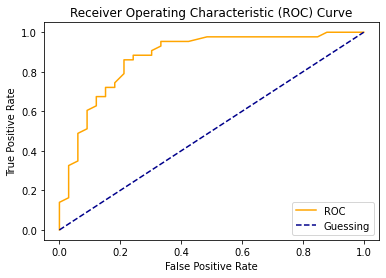

In [31]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.8731501057082452

# confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_preds = clf.predict(X_test)

cm = confusion_matrix(y_test, y_preds)
cm

array([[27,  6],
       [12, 31]], dtype=int64)

In [38]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,27,6
1,12,31


In [39]:
import sklearn
sklearn.__version__

'0.24.2'

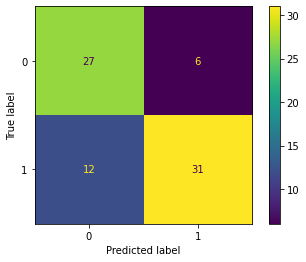

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot();

In [41]:
clf.classes_

array([0, 1], dtype=int64)

* **Precision** - Indicates the proportion of positive identifications (model predicted class `1`) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        33
           1       0.84      0.72      0.77        43

    accuracy                           0.76        76
   macro avg       0.77      0.77      0.76        76
weighted avg       0.77      0.76      0.76        76



### Regression model evaluation metrics

1. **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. 
2. **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
3. **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

In [43]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [44]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [45]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [46]:
# Calculate the models R^2 score
model.score(X_test, y_test)

0.8057655811971304

In [47]:
from sklearn.metrics import r2_score

In [48]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3267155795542638

In [49]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds}).reset_index()

df.drop("index", axis=1)

,actual values,predictions
0,0.47700,0.494300
1,0.45800,0.764200
2,5.00001,4.934686
3,2.18600,2.561130
4,2.78000,2.297640
...,...,...
4123,2.63300,2.240880
4124,2.66800,1.963990
4125,5.00001,4.844759
4126,0.72300,0.716810


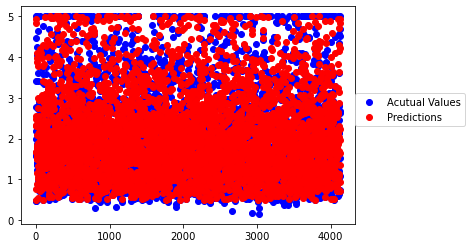

In [50]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")

ax.legend(loc=(1, 0.45));

In [51]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.25452652628268335

# scoring parameter

## cross_val_score

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [53]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [54]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [55]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [56]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.83


In [57]:
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

The cross-validated recall is: 0.85


In [58]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")

The cross-validated F1 score is: 0.84


# RandomizedSearchCV

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


In [60]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [61]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = RandomForestClassifier()

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

In [62]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [63]:
clf = rs_clf.best_estimator_
clf

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=200)

# GridSearchCV

It searches for everything in the search space and so it takes a long time to complete

In [64]:
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

In [65]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress


gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   2.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   2.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   2.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   2.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   2.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_s

KeyboardInterrupt: 

## I stopped this because it was taking toooooo long. Use grid search with caution